In [26]:
from torchvision.io.video import read_video
from torchvision.models.video import r3d_18, R3D_18_Weights

In [27]:
import av

In [28]:
av.__version__

'8.0.1'

In [29]:
ls Kinetics

files/              tars/               train/              vinhome_guests.mp4


In [30]:
vid, _, _ = read_video("./olympic.mov", output_format="TCHW")

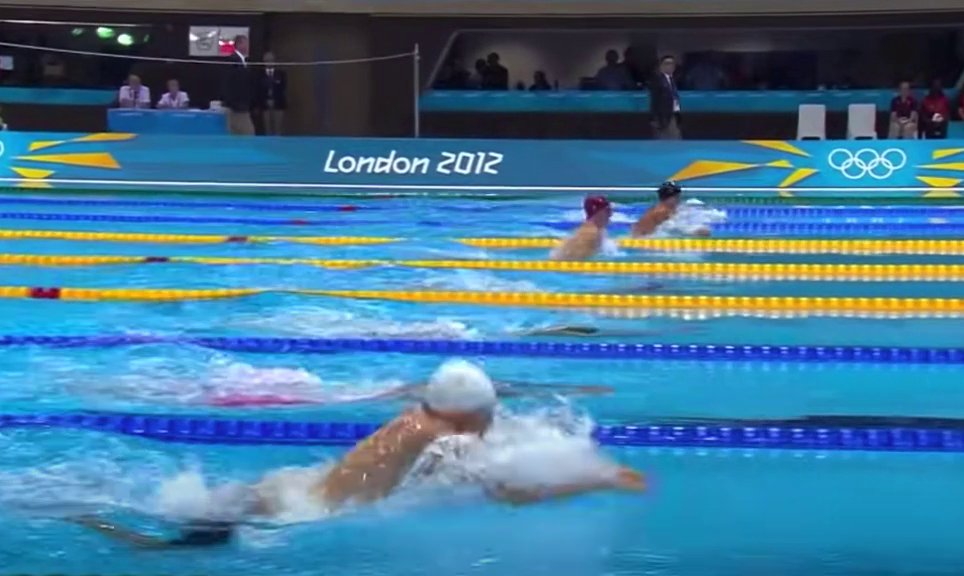

In [31]:
import torch
import torchvision.transforms.functional as F
img1_batch = torch.stack([vid[10], vid[20]])
img = F.to_pil_image(img1_batch[0].to("cpu"))
img

In [32]:
weights = R3D_18_Weights.DEFAULT
model = r3d_18(weights=weights)
model.eval()

VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1):

In [33]:
preprocess = weights.transforms()

In [34]:
weights.meta["categories"]

['abseiling',
 'air drumming',
 'answering questions',
 'applauding',
 'applying cream',
 'archery',
 'arm wrestling',
 'arranging flowers',
 'assembling computer',
 'auctioning',
 'baby waking up',
 'baking cookies',
 'balloon blowing',
 'bandaging',
 'barbequing',
 'bartending',
 'beatboxing',
 'bee keeping',
 'belly dancing',
 'bench pressing',
 'bending back',
 'bending metal',
 'biking through snow',
 'blasting sand',
 'blowing glass',
 'blowing leaves',
 'blowing nose',
 'blowing out candles',
 'bobsledding',
 'bookbinding',
 'bouncing on trampoline',
 'bowling',
 'braiding hair',
 'breading or breadcrumbing',
 'breakdancing',
 'brush painting',
 'brushing hair',
 'brushing teeth',
 'building cabinet',
 'building shed',
 'bungee jumping',
 'busking',
 'canoeing or kayaking',
 'capoeira',
 'carrying baby',
 'cartwheeling',
 'carving pumpkin',
 'catching fish',
 'catching or throwing baseball',
 'catching or throwing frisbee',
 'catching or throwing softball',
 'celebrating',
 'cha

In [35]:
batch = preprocess(vid).unsqueeze(0)

In [36]:
prediction = model(batch).squeeze(0).softmax(0)
label = prediction.argmax().item()
score = prediction[label].item()
category_name = weights.meta["categories"][label]
print(f"{category_name}: {100 * score}%")

swimming breast stroke: 89.77678418159485%
